# imagineRio Narratives: A Map-based Storytelling App for Rio de Janeiro

 ### Alida C.  Metcalf [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-8175-8339) 
Rice University

### David  Heyman [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0003-2727-5111) 
Axis Maps

### Bruno  Buccalon [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-6463-936X) 
Rice University

[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
© Alida C. Metcalf, David Heyman, and Bruno Buccalon. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


An draft version of this paper was presented at the Social Science History Association Annual Meeting in Philadelphia, November 12, 2021.

HGIS, Storytelling, Urban History, Rio de Janeiro

imagineRio Narratives is a map-based storytelling application custom designed for imagineRio, a spatial history platform about the city of Rio de Janeiro. Integrated with an online Historical Geographic Information System (HGIS) built for shared research and scholarship, Rio Narratives offers an elegant environment for writing digital publications related to the urban history of Rio. Leveraging the microservices architecture of imagineRio, the application encourages its users to engage with transmedia storytelling through a simplified interface that does not require GIS expertise or knowledge of the intricacies of spatial data acquisition. This open-source project gives all users access to imagineRio’s temporally accurate basemap, as well as to its curated primary sources--georeferenced historical maps and urban plans. In this article, the narrative layer discusses how the idea for Rio Narratives developed from our past experiences with ESRI StoryMaps. It also discusses how the Covid-19 pandemic (severe in both the US and Brazil) shaped our development process, as we recognized the urgent need to engage meaningfully with a community of early adopters based in Rio. The hermeneutics layer discusses the conception and development choices around the narratives editor, which enables users to write in connection with our digital atlas. In this section we introduce how users can organize their content on cards associated with specific locations and points in time. Finally, the data layer presents the source code of Rio Narratives editor. In this layer we look forward to working with JDH’s editors to leverage how to best share a [JavaScript project](https://github.com/imaginerio/narratives) within the journal’s Python-based coding environment.

## Introduction

imagineRio is an interactive platform that presents the spatial history of the municipality of Rio de Janeiro through historical maps, city plans, and artists’ views of the city. At its heart is a time-accurate digital map that cartographically represents every year from the city’s founding in 1565 to the present. Through its user interface, paintings and photographs by artists, historical maps by cartographers, and site plans by architects or urbanists are all geolocated in space and dated in time. These maps, views, and plans illustrate the city as it existed and as it was imagined. It is a visualization of a city’s history that offers creative new ways for scholars, students, and engaged amateurs to study the past. As with many cities, Rio de Janeiro’s urban history is particularly well suited to being captured in this way, because the city’s natural environment, urban fabric, and self-representation has changed dramatically over time.


The third version of imagineRio, launched fall 2021, was created in partnership between Rice University and the Instituto Moreira Salles (IMS) in Rio de Janeiro (fig. 1). Funded by a Digital Art History grant by the Getty Foundation titled “Situated Views of Rio de Janeiro,” this version brings major technical improvements to our platform, as well as 4,000 geolocated photographs of Rio de Janeiro created between the 1860s and the 1930s, which come from IMS collections. Within a new user interface, users can browse the interactive map while filtering images by time, space and metadata. Developed by Axis Maps, the new version provides a much faster mapping engine based on vector tiles rendered client-side by MapLibre, an open-source fork of the Mapbox GL JS map-rendering engine, a robust microservices architecture, and a serverless image repository compliant with the IIIF specifications.


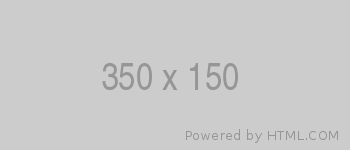

In [1]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "This is a sample image",
            "with subtitle"
          ]
        }
    }
}
display(Image("media/350x150.png"), metadata=metadata)

The geographic database of imagineRio is temporally accurate to the year, and its new interface has a dual display with a side-by-side map and image library. The image database, which appears on the left side of the screen, can be browsed, which allows the geolocated work of particular artists to be found. By adopting the IIIf specifications, it is now possible to zoom into images and to study details. Similarly, a filter on the image database allows all of the georeferenced historical maps and urban plans to be displayed. It is then possible to turn on a historical map or plan and to see it overlaid on the digital map. The historical maps and visual imagery are enhanced with metadata that provides the viewer with essential information on the creator, date of creation, institutional repository, and rights. These metadata are easily accessed, and we are working on a linked repository in Wikidata that will provide basic information on such things as buildings, parks, monuments, etc. The addition of four thousand photographs from major Brazilian photographers such as Marc Ferrez, Georges Leuzinger, or Guilherme Santos makes it possible for the first time to see their work temporally and spatially. In its new version, imagineRio offers researchers the ability to work simultaneously with digitized imagery and a GIS environment. This opens up new dimensions for researchers interested in change over time, photography in the city, urban life, urban planning, or environmental change. Streets,parks, public spaces, neighborhoods, and landscapes can be seen on the digital basemap, on georeferenced historical maps, and as artists represented them. 


All of this is exciting, but how can imagineRio be used in scholarly research and publications? Simple maps can be captured with a screenshot. This dynamic nature of imagineRio is a form of expressive cartography, for the user can zoom to an area, select a date, highlight layers, and the map will respond accordingly. These custom maps can and have been used in online publications, as well as in formal academic products, such as a PhD. thesis. However, scholars generally want to customize their maps even more in order to illustrate their arguments, or to highlight the spatial context of their analyses. This requires expertise in GIS, or consultation with a GIS specialist, as well as their own research and even adding their own data. 


To bridge this gap between historical research and GIS expertise, we started experimenting with ESRI’s StoryMap platform, which offers ways to incorporate maps and images and text. In ESRI’s first Story Map iteration, the various templates, such as Cascade and Map Journal, allowed for attractive narratives that combined maps, text, and imagery. In 2019, ESRI released a new version of ArcGIS StoryMaps that dispensed with the multiple templates in favor of a single builder. The platform has been successful, according to ESRI, for it allows the writer to easily use maps, images, and media. Successful examples of StoryMaps promoted by ESRI show how organizations, such as the Jane Goodall Institute or the US Forest Service have used ArcGIS StoryMaps to tell their stories to wide audiences. However, these StoryMaps consist mostly of scrolling web pages that include some maps, and do not directly immerse the viewer into a digital platform. Our experience of working with students and historians to create StoryMaps around imagineRio revealed limitations with both the Classic ESRI Story Maps and the current ArcGIS StoryMaps.


## Working with ESRI StoryMaps


We were drawn to ESRI’s Classic template Story Map Journal for it allowed for the creation of an online, open access publication that featured a long scrolling text (on the left of the screen) with a window on the right where we could showcase imagineRio. With this platform in mind, we reached out to Mary Karasch, a prominent scholar of slave life in the city of Rio, with the invitation to create a Story Map. We envisioned a Story Map in which readers would engage simultaneously with Karasch’s written text and her selected imagery and imagineRio’s temporally accurate basemap. As a viewer reads Karasch’s text on the left side of the screen, imagineRio, positioned to the comparable historical moment on the right side of the screen, shows the city at that time. Readers may enter the map and explore, and they may return to the text at any time. Karasch’s text resembles an academic article--it has footnotes (not supported in the ESRI template), an argument, and it follows the scholarly writing conventions used by  historians. The result is an authoritative text, illustrated with images and static maps, read alongside of imagineRio set to a specific year. On entering the imagineRio window, the user can zoom in and out, move around, and select georeferenced maps and geolocated images to turn on and off. In Karasch’s text pane, images can be enlarged in order to see greater detail. Available in both English and Portuguese, Karasch’s Story Map is a unique publication, and it is fully open access (fig. 2). 


FIGURE KARASH

Undoubtedly, Karasch’s “Rio de Janeiro: A Colonial City until 1850” is a successful online publication, nevertheless, the Story Map took months to create. A traditional scholar still dedicated to print, Karasch found working outside of traditional workflows difficult. The result was that Karasch focused on the text and the selection of historical images to illustrate it, while a team created the Story Map. This team included a GIS specialist, a historian familiar with imagineRio, and an editorial assistant. 

ESRI Story Maps seem ideal for teaching, for students are tech savvy. For students at Rice University, who have never been to Rio and who do not speak Portuguese, the ESRI Story Map platform has an added benefit: it allows them to work with historical images and maps rather than textual documents, which are invariably in Portuguese. Images and maps are important primary sources, and because the text on them is limited, students who cannot speak Portuguese can work with them, with additional help from their instructors. In spring semester 2020, Metcalf decided to adapt an assignment, which students in former years completed using Posters or PowerPoints, to ESRI’s ArcGIS StoryMaps. The project is organized around a novel, which students read in translation, and the assignment asks students to pick a theme from the novel, research it in academic publications (books, articles) and then create a presentation. The goal for the spring 2020 semester was an ESRI StoryMap, using the new single builder.

However, the shutting down of campus for a week due to the outbreak of Covid-19 as well as the move to teaching online, required the instructor to modify the assignment. Instead of creating individual StoryMaps, each student contributed to one, collaborative StoryMap. The instructor wrote a substantial part of the StoryMap, and each student contributed a “Sidecar”--an ESRI term for a section of the StoryMap. Each Sidecar had a map, created by the GIS specialist, that the students annotated using GIS tools. Because it was not then possible for multiple users to work simultaneously on a single StoryMap, all of the text was written in a group GoogleDoc, which was then transferred to the StoryMap. The students reserved specific time slots when they entered the StoryMap editor to upload and refine their text and selected images, which appeared on the left side of their Sidecar. As can be seen in fig. 3, the map from imagineRio has been annotated by the student so that spaces described in the text can be visualized on the map. 


FIGURE

The result was successful, and the StoryMap was translated into Portuguese to ensure that it would be accessible to anyone interested in Brazil. Without the interruption of Covid-19, each student would have created their own StoryMap. Nevertheless, it was clear that even with their greater technical skills, GIS specialists were needed to make the StoryMap a success. In addition to the instructor, two GIS specialists were involved in the project: one set up accounts and taught the students the platform, while the other created the basemaps from imagineRio that each student annotated. 

Based on this experience with Karasch, Rice students, and others, we recognized the limitations of the ESRI platform. Despite its beautiful templates, ESRI’s StoryMaps still require writers to be skilled mapmakers, or to work in consultation with one. Many of our intended users are in Brazil, and they would likely be novices when it came to GIS and it would be unlikely that they would have access to a GIS specialist. Moreover, to create an ESRI StoryMap, one has to have access to a subscription to ArcGIS. As our primary users are in Brazil, where few have subscriptions to ESRI, this platform was not likely to be used. This led us to design and build our own application. 

Our goal was our own digital publication platform that would be simple to use, accessible to wider audiences, and that would not require any expertise with GIS. At the same time, we wanted to showcase the HGIS data in imagineRio. One of the great strengths of imagineRio is its simple but powerful use of a time slider. It is, in fact, much easier to visualize change over time in imagineRio than in its underlying ArcGIS. We believed that our application should allow our users to take advantage of our temporally accurate map, as well as have access to all layers published in imagineRio. This would allow our users to work with our temporally accurate map and our georeferenced historical maps and plans. Such an approach increases the accessibility of knowledge and the sharing of research. For, in addition to providing the means to write Narratives, we envisioned their public presentation on the imagineRio website.


Rio Narratives (Narrativas do Rio in Portuguese) is our bi-lingual, easy to use digital writing platform that fully incorporates the temporally accurate map that underlies imagineRio. This became possible with the new version of imagineRio, released in 2021. The development of the Narratives App occurred in two stages: Stage One, from February 2020 to August 2020, during which time we came up with our concept and initial prototype; and Stage Two, from September 2020 to August 2021, when we organized a group of users in Rio to create narratives and to provide us with feedback. Both stages were funded by grants awarded by Rice University’s Humanities Research Center, from its Spatial Humanities Initiative funded by the Andrew W. Mellon Foundation.


While the approach popularized by ESRI Story Maps was innovative for its time, scroll-based interactive narratives have a relatively long tradition in web development. Based on Axis Maps’ extensive know-how of interactive cartography design, we aimed to build an application that could harness the full potential of client-side map-rendering with vector tiles. As part of imagineRio’s design for its third version, the transition from raster to vector tiles offered new opportunities for crafting narratives with map-based animations. The new mapping engine of imagineRio greatly improved the in-browser dynamism, allowing users to smoothly pan, scroll, rotate and tilt the map orientation. This created the perfect platform for the more simplified, map-centric approach we desired for the Rio Narratives App.

At the heart of Rio Narratives is imagineRio’s temporally-aware digital map. To begin a Narrative, the user selects a year in time, as well as a geographic space in the city, such as a neighborhood. We were inspired by the card layout in PowerPoint, which is used by many, as well as the various uses of cards in Scrivener, which is familiar to writers. By adopting cards, we believed that users could easily organize their thoughts, images, and writing. Essentially, cards were a good frame of reference for users entering into an unfamiliar medium--that of a map-centric writing platform. The cards appear in the editor, where authors may write text, upload images, include citations, as well as add annotations to the map. These cards then scroll alongside the map, keeping the map as the main focus. This card structure of the Rio Narratives user interface leads users to embrace one of our constraints--by keeping their text and images on cards, which can be sized and reordered, this avoids the desire to  copy and paste long prose on top of a map. As compared to ESRI StoryMaps, the Rio Narratives App is far simpler, and it does not require that a user understand ESRI software or have access to a GIS specialist. The manipulation of the map is simple: users select the year, and then zoom and rotate to the area of interest. 


The text editor (fig. 4), illustrates these basic design choices. Cards on the left can be seen at a glance and reorganized as the user desires. The card being edited has simple fields to be filled in, such as title and description. Editing tools include the usual Bold and Italics, as well as a superscript font to be used for footnotes. Users can select the size of the card, upload an image, provide an image citation, and include hyperlinks. It is a WYSIWYG text editor and we used the TinyMCE library. 


FIGURE

The Rio Narratives App allows for limited but powerful customization. Historical images can be uploaded onto the cards, which can be customized to be small, medium, or large in size. The archival information about the images, as well as links to the archives where the images reside, can be added directly to the card. At the moment, it is not possible to bring in the geolocated images from imagineRio. However, users can upload their own research images to illustrate their arguments. There are three databases that are particularly pertinent for historical imagery of Rio de Janeiro: Brasiliana Fotográfica,  Brasiliana Iconográfica, Biblioteca Nacional, Brasil. While not directly tied into our App, these image databases are familiar to users in Brazil as well as to scholars in the U.S. Users may download these images and upload them into their Narratives, and provide both a citation as well as a link back to the image in its original database. The Narratives App supports media, such as YouTube videos. Hence the viewer can watch a specific clip within the window on the card, with the map set to the year and location where the events took place (fig. 5).


FIGURE

In another example, a Narrative on the history of slums (cortiços) and hillside communities (favelas)  in the city of Rio begins with the specific area of the city where swamps were filled at the beginning of the nineteenth century. The author set the time slider on the map to a specific date and zoomed the map to the desired location. A georeferenced map in imagineRio was selected and  turned on to allow historical details to be visible (fig. 6). 


FIGURE

Narratives of Rio is map-centric, meaning that imagineRio’s temporally accurate digital map lies at the heart of every Narrative. While imagineRio contains a great deal of information, it does not, and cannot contain everything. As with the case in any map, abstraction and selection are at the heart of map-making, and maps work because they simplify the world. So too does imagineRio simplify the city. However, the Narratives of Rio App allows writers to add additional, specific details to the imagineRio map in their Narrative, in order to highlight specific places. These places can also be labeled so that readers can clearly see them. For example, a writer documenting how the port of Rio changed, can easily drop points on the map, and then add labels. This makes it clear to the reader where the locations described by the author lie (fig. 7). Moveover, the underlying map, with its annotations added by the writer of a narrative, can be manipulated by the reader. It can be tilted, panned, rotated, or zoomed to give the reader a better view . 


FIGURE

The Rio Narratives web application is built on top of the KeystoneJS, an open-source Javascript CMS (content management system) that uses MongoDB to store data. The user-interface was custom-built in NextJS and accounts for approximately 80% of the development effort. This front-end application interacts with the CMS via a GraphQL API to read and write data to the database. The application integrates with imagineRio’s microservices architecture, sharing the diachronic atlas map renderer, the MapboxGL basemap styles, and imaginerioSearch to retrieve information on features and basemaps..


## User feedback and community building


Between December 2020 and July 2021, during the covid-19 pandemic, our team hosted three online workshops with a small group of researchers, students, and scholars based in Rio de Janeiro. Each of the fifteen participants was carefully chosen based on their knowledge of Rio de Janeiro and their interest in imagineRio. Each participant was given their own account and each agreed to draft a Narrative on a subject of interest to them. Among our participants were historians, architects, urban planners, and literary scholars. Each received a small honorarium in recognition of their contribution to the development of the Narrativas do Rio App. 


We had two objectives for our group: one immediate and one longer term. First, we wished to collect feedback on the application’s user interface and functionalities. We wanted to know how easy the App was to use, what suggestions engaged users had for improvement, whether the App fostered creative new ways to write about Rio, and if the App would be useful in their teaching and research. A long-term goal was to foster a local community of users in Rio that could act as future ambassadors for our project. 


In order to limit a deluge of emails ranging from simple questions to more substantive suggestions, we built an online forum where we asked users to present themselves, report bugs and request new features. We also published a basic tutorial to guide users through the basic functionalities of the application. The tutorials were written initially in English by a Rice undergraduate student who was hired as part of the grant, and later each tutorial was translated into Portuguese. 


This interaction--both in the forum and in the online meetings with our group of scholars, teachers, and professionals--was fundamental for both creating a collaborative spirit in the group, and for identifying critical issues within our interface that needed to be addressed before a public launch. We were able to fix many bugs and improve the design of several features. Although we could not honor all requests, we selected those that seemed most desirable and were able to include them in the final version. 


Finally, we worked behind the scenes to create a legal framework, which we needed because we would be inviting the public to create Narratives that would be published by imagineRio. Lawyers in Brazil and at Rice University crafted a Terms of Use and a Privacy Policy--available in English and Portuguese--that added a layer of privacy protection to the users while giving us ways to remove any instance of hate speech. These documents also guarantee that users can download all their data and exclude their accounts if they so wish.


Currently under discussion is how to shape the Map Gallery. Each Narrative will have a home page (fig. 7) that will provide the author’s name, the title, a cover image, and a description.

FIGURE GALLERY

The published Narrativas will appear in a Map Gallery (fig. 8). In the gallery, Narrativas are categorized by fields, such as history, architecture, or literature, and they carry tags supplied by the author. 


FIGURE GALLERY

We are currently discussing how to best serve our users with our Map Gallery. Several options are before us. One is that there would be a completely open Map Gallery where anyone who wished to could publish their Narrative. From time to time, we would review the published Narratives and highlight those we found especially interesting or noteworthy. Such Narratives would be designated in some way, such as “Editor’s Picks.” The second option is  a simplified peer-review process, wherein Narratives would be sent to members of our group for review. Those Narratives that had undergone revision following a peer review would receive some sort of stamp indicating that. This would be beneficial for those in academia, for the Narrative could count as a form of scholarly publishing. A third option is to have different sections, so that authors could select a category, depending on their goals and purposes. This would enable Narratives of many different types and levels of expertise to be included in the Map Gallery. Finally, we are well aware that many kinds of publications are possible and that some users may simply want to address a question, rather than writing a full Narrative. All of these possibilities are still under consideration, and for the moment we will wait and see what kinds of Narratives come our way.


## Conclusion

This project marks a turning point in our outreach, for we recognized the need to engage meaningfully with those using imagineRio and to offer creative and technically sound ways to engage new users. ESRI StoryMaps will continue to offer an attractive StoryMap platform to those who have subscriptions and access to GIS expertise. A user of imagineRio can create StoryMaps that utilize imagineRio, however, they would need to collaborate directly with us. This is because the underlying HGIS is not publicly available.  Similarly, Google’s Voyager offers another way to create map-centric storytelling. A user creating a Story Map in Google Earth will fly in and out of the city to specific points where a user can add images, links, media and text. This will be useful for modern topics, however the city cannot be presented as it once existed (or as it was once imagined), which is the unique and compelling feature of imagineRio. Similarly, Google’s layers are more generic and do not have the same depth as those in our HGIS.  


The Rio Narratives App lets people craft their own stories using the rich geographic layers of imagineRio. Not only does this application allow full access to our HGIS, but it also lets users create, label, and annotate maps of any location in the city in any scale, and to embed custom media objects like images, audio and video. Our online forum will continue, and it will serve as the place where users can communicate with each other and learn about the different features of the application. Because we tested our service with a dedicated group in Rio de Janeiro, we are confident that we can now offer many more students, scholars, historians, and interested laypeople a writing platform for map-based storytelling. It should be emphasized again that the application, like everything in imagineRio, is fully bilingual (English and Portuguese). We believe Rio Narratives can lead to new ways of interpreting the past, understanding the present, and possibly even envisioning a better future for Rio de Janeiro. 


## Bibliography

cite2c export